In [45]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import glob


import matplotlib.pyplot as plt
from matplotlib import rc, font_manager
import matplotlib.font_manager as fm

# 디렉토리 및 파일 이름에 맞추어 변경
font_location = 'C:/Windows/Fonts/malgun.ttf'

font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

import re
from functools import reduce

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from collections import Counter

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.o

In [22]:
all_files=glob.glob('./research/my*xls')

In [23]:
all_files

['./research\\myCabinetExcelData (1).xls',
 './research\\myCabinetExcelData (2).xls',
 './research\\myCabinetExcelData (3).xls',
 './research\\myCabinetExcelData (4).xls',
 './research\\myCabinetExcelData (5).xls',
 './research\\myCabinetExcelData (6).xls',
 './research\\myCabinetExcelData (7).xls',
 './research\\myCabinetExcelData (8).xls',
 './research\\myCabinetExcelData (9).xls',
 './research\\myCabinetExcelData.xls']

In [24]:
# 파일 하나를 읽어서 df에 넣음. 리스트에 누적

In [25]:
all_files_data=[]

In [27]:
for file in all_files:
    df = pd.read_excel(file)
    all_files_data.append(df)
print(len(all_files_data))

10


In [29]:
all_files_data

[    Unnamed: 0   번호                                                 제목  \
 0          NaN    1        Clustering Big Spatiotemporal-Interval Data   
 1          NaN    2            Intelligent big data analysis: a review   
 2          NaN    3  Improved big data stock index prediction using...   
 3          NaN    4    Guest Editorial: Big Data Analytics and the Web   
 4          NaN    5    Guest Editorial: Big Data Analytics and the Web   
 ..         ...  ...                                                ...   
 95         NaN   96  A Detailed Review on the Prominent Compression...   
 96         NaN   97  A Survey on Data Collection for Machine Learni...   
 97         NaN   98  An overview of online based platforms for shar...   
 98         NaN   99  Divide and recombine (D&R) data science projec...   
 99         NaN  100  The Gamma Matrix to Summarize Dense and Sparse...   
 
                                                    저자  \
 0   Shao, W.; Salim, F. D.; Song, A.; B

In [30]:
all_files_data_concat=pd.concat(all_files_data, axis=0, ignore_index=True)

In [31]:
all_files_data_concat

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Clustering Big Spatiotemporal-Interval Data,"Shao, W.; Salim, F. D.; Song, A.; Bouguettaya, A.",unknown,2016
1,NaN,2,Intelligent big data analysis: a review,"Tsai, Chun-Wei; Yang, Ya-Lan; Chiang, Ming-Cha...",Inderscience,2015
2,NaN,3,Improved big data stock index prediction using...,"Eapen, Jithin; Verma, Abhishek; Bein, Doina",Inderscience,2021
3,NaN,4,Guest Editorial: Big Data Analytics and the Web,"Sheng, Q. Z.; Vasilakos, A. V.; Yu, Q.; Yao, L.",unknown,2015
4,NaN,5,Guest Editorial: Big Data Analytics and the Web,"Sheng, M.; Vasilakos, A. V.; Yu, Q.; You, L.",unknown,2016
...,...,...,...,...,...,...
995,NaN,96,Health big data analytics: current perspective...,"Kuo, Mu-Hsing; Sahama, Tony; Kushniruk, Andre ...",Inderscience,2014
996,NaN,97,Scalable big data modelling,"Patel, Jayesh",Inderscience,2021
997,NaN,98,Intelligent big data analysis: a review,"Tsai, Chun-Wei; Yang, Ya-Lan; Chiang, Ming-Cha...",Inderscience,2014
998,NaN,99,Health big data analytics: current perspective...,"Kuo, Mu-Hsing; Sahama, Tony; Kushniruk, Andre ...",Inderscience,2014


In [34]:
all_files_data_concat.head()

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Clustering Big Spatiotemporal-Interval Data,"Shao, W.; Salim, F. D.; Song, A.; Bouguettaya, A.",unknown,2016
1,NaN,2,Intelligent big data analysis: a review,"Tsai, Chun-Wei; Yang, Ya-Lan; Chiang, Ming-Cha...",Inderscience,2015
2,NaN,3,Improved big data stock index prediction using...,"Eapen, Jithin; Verma, Abhishek; Bein, Doina",Inderscience,2021
3,NaN,4,Guest Editorial: Big Data Analytics and the Web,"Sheng, Q. Z.; Vasilakos, A. V.; Yu, Q.; Yao, L.",unknown,2015
4,NaN,5,Guest Editorial: Big Data Analytics and the Web,"Sheng, M.; Vasilakos, A. V.; Yu, Q.; You, L.",unknown,2016


In [35]:
all_files_data_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  0 non-null      float64
 1   번호          1000 non-null   int64  
 2   제목          1000 non-null   object 
 3   저자          1000 non-null   object 
 4   출판사         1000 non-null   object 
 5   출판일         1000 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 47.0+ KB


In [36]:
all_files_data_concat.to_csv('./research/total_concat.csv', encoding='utf8', index=False)

In [39]:
df=pd.read_csv('research/total_concat.csv', encoding='utf8')

In [40]:
df.head(10)

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Clustering Big Spatiotemporal-Interval Data,"Shao, W.; Salim, F. D.; Song, A.; Bouguettaya, A.",unknown,2016
1,NaN,2,Intelligent big data analysis: a review,"Tsai, Chun-Wei; Yang, Ya-Lan; Chiang, Ming-Cha...",Inderscience,2015
2,NaN,3,Improved big data stock index prediction using...,"Eapen, Jithin; Verma, Abhishek; Bein, Doina",Inderscience,2021
3,NaN,4,Guest Editorial: Big Data Analytics and the Web,"Sheng, Q. Z.; Vasilakos, A. V.; Yu, Q.; Yao, L.",unknown,2015
4,NaN,5,Guest Editorial: Big Data Analytics and the Web,"Sheng, M.; Vasilakos, A. V.; Yu, Q.; You, L.",unknown,2016
5,NaN,6,Guest Editorial: Big Data Infrastructure I,"Chen, J.; Wang, H.",unknown,2018
6,NaN,7,Guest Editorial: Big Scholar Data Discovery an...,"Lin, Y.; Tong, H.; Tang, J.; Candan, K. S.",unknown,2017
7,NaN,8,Speed Up Big Data Analytics by Unveiling the S...,"Wang, J.; Zhang, X.; Yin, J.; Wang, R.; Wu, H....",unknown,2018
8,NaN,9,Guest Editorial: Big Scholar Data Discovery an...,"Lin, Y.; Tong, H.; Tang, J.; Candan, K. S.",unknown,2016
9,NaN,10,Petuum: A New Platform for Distributed Machine...,"Xing, E. P.; Ho, Q.; Dai, W.; Kim, J. K.; Wei,...",unknown,2015


# 전처리

In [41]:
# 제목 추출
all_titles=df['제목']

In [42]:
all_titles

0            Clustering Big Spatiotemporal-Interval Data
1                Intelligent big data analysis: a review
2      Improved big data stock index prediction using...
3        Guest Editorial: Big Data Analytics and the Web
4        Guest Editorial: Big Data Analytics and the Web
                             ...                        
995    Health big data analytics: current perspective...
996                          Scalable big data modelling
997              Intelligent big data analysis: a review
998    Health big data analytics: current perspective...
999    Agile Big Data Analytics for Web-Based Systems...
Name: 제목, Length: 1000, dtype: object

In [46]:
stopwords=set(stopwords.words('english'))

In [47]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [49]:
lemma=WordNetLemmatizer() #fly, flies, flied  ==> fly

In [50]:
# 글자만 추출(글자가 아닌 것은 공백으로 replace)
# 분석에 사용하지 않을 글자들을 제거(불용어 처리)
# 표제어 추출(단어의 원형)

In [60]:
words=[] # 전처리한 결과를 모을 리스트

In [61]:
for title in all_titles:
    pre=re.sub(r"[^a-zA-Z]+", " ", str(title)) # 글자가 아닌 것은 공백으로 대체
    pre=word_tokenize(pre.lower()) # 모든 글자를 소문자로 변경 후 토큰화
    pre=[w for w in pre if w not in stopwords]  # 불용어 처리
    pre = [lemma.lemmatize(w) for w in pre] # 표제어 추출(단어의 원형)
    
    words+=pre # 하나의 리스트로 합치기

In [62]:
words

['clustering',
 'big',
 'spatiotemporal',
 'interval',
 'data',
 'intelligent',
 'big',
 'data',
 'analysis',
 'review',
 'improved',
 'big',
 'data',
 'stock',
 'index',
 'prediction',
 'using',
 'deep',
 'learning',
 'cnn',
 'gru',
 'guest',
 'editorial',
 'big',
 'data',
 'analytics',
 'web',
 'guest',
 'editorial',
 'big',
 'data',
 'analytics',
 'web',
 'guest',
 'editorial',
 'big',
 'data',
 'infrastructure',
 'guest',
 'editorial',
 'big',
 'scholar',
 'data',
 'discovery',
 'collaboration',
 'speed',
 'big',
 'data',
 'analytics',
 'unveiling',
 'storage',
 'distribution',
 'sub',
 'datasets',
 'guest',
 'editorial',
 'big',
 'scholar',
 'data',
 'discovery',
 'collaboration',
 'petuum',
 'new',
 'platform',
 'distributed',
 'machine',
 'learning',
 'big',
 'data',
 'kvasir',
 'scalable',
 'provision',
 'semantically',
 'relevant',
 'web',
 'content',
 'big',
 'data',
 'framework',
 'platform',
 'big',
 'data',
 'analytics',
 'distributed',
 'scale',
 'storage',
 'system',
 'n

In [67]:
len(words)

9227

In [64]:
count = Counter(words)
count

Counter({'clustering': 9,
         'big': 1119,
         'spatiotemporal': 1,
         'interval': 3,
         'data': 1250,
         'intelligent': 13,
         'analysis': 79,
         'review': 25,
         'improved': 5,
         'stock': 4,
         'index': 6,
         'prediction': 19,
         'using': 62,
         'deep': 9,
         'learning': 41,
         'cnn': 1,
         'gru': 1,
         'guest': 13,
         'editorial': 16,
         'analytics': 93,
         'web': 10,
         'infrastructure': 10,
         'scholar': 3,
         'discovery': 13,
         'collaboration': 6,
         'speed': 1,
         'unveiling': 1,
         'storage': 9,
         'distribution': 10,
         'sub': 1,
         'datasets': 2,
         'petuum': 1,
         'new': 43,
         'platform': 28,
         'distributed': 19,
         'machine': 21,
         'kvasir': 1,
         'scalable': 14,
         'provision': 2,
         'semantically': 2,
         'relevant': 1,
         'cont

In [66]:
count.most_common(20)

[('data', 1250),
 ('big', 1119),
 ('analytics', 93),
 ('based', 87),
 ('analysis', 79),
 ('using', 62),
 ('driven', 58),
 ('approach', 53),
 ('challenge', 51),
 ('system', 49),
 ('model', 44),
 ('new', 43),
 ('learning', 41),
 ('application', 38),
 ('science', 37),
 ('framework', 33),
 ('health', 33),
 ('management', 32),
 ('opportunity', 31),
 ('research', 31)]

In [72]:
word_count=dict() # 일정 빈도수 이상만을 담을 딕셔너리

In [77]:
# 빈도수가 30 이하인 것은 목록에서 제거
word_count=dict()
for tag, counts in count.most_common(50):
    if(counts>30):
        word_count[tag]=counts

In [78]:
word_count

{'data': 1250,
 'big': 1119,
 'analytics': 93,
 'based': 87,
 'analysis': 79,
 'using': 62,
 'driven': 58,
 'approach': 53,
 'challenge': 51,
 'system': 49,
 'model': 44,
 'new': 43,
 'learning': 41,
 'application': 38,
 'science': 37,
 'framework': 33,
 'health': 33,
 'management': 32,
 'opportunity': 31,
 'research': 31}

In [79]:
# 주제와 더무 일치하는 단어 삭제
del word_count['big']
del word_count['data']

In [81]:
word_count.values()

dict_values([93, 87, 79, 62, 58, 53, 51, 49, 44, 43, 41, 38, 37, 33, 33, 32, 31, 31])

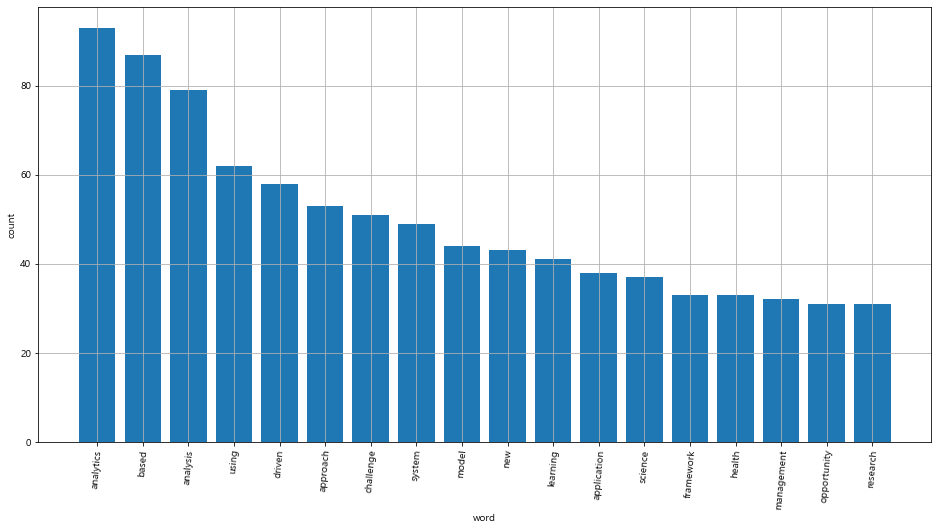

In [84]:
plt.figure(figsize=(16,8))
plt.xlabel('word')
plt.ylabel('count')
plt.grid(True)
plt.bar(range(len(word_count)), word_count.values())
plt.xticks(range(len(word_count)), word_count.keys(), rotation='85')
plt.show()